In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2019-07-08 07:17:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2019-07-08 07:17:17 (84.0 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
import json

In [0]:
with open("/tmp/sarcasm.json" , 'r') as file:
  datastore = json.load(file)

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_token = '<OOV>'
training_size = 10000

In [0]:
sentences = []
labels = []
urls = []
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [7]:
print ( sentences[0:5] , labels[0:5]  )

["former versace store clerk sues over secret 'black code' for minority shoppers", "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "mom starting to fear son's web series closest thing she will have to grandchild", 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'j.k. rowling wishes snape happy birthday in the most magical way'] [0, 0, 1, 1, 0]


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
# Splitting the dataset
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [13]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

W0708 07:17:59.016544 140279305697152 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0708 07:17:59.023684 140279305697152 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0708 07:17:59.134051 140279305697152 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.o

In [14]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 10000 samples, validate on 16709 samples
Epoch 1/30
10000/10000 - 2s - loss: 0.6722 - acc: 0.5698 - val_loss: 0.6192 - val_acc: 0.6566
Epoch 2/30
10000/10000 - 1s - loss: 0.4775 - acc: 0.8215 - val_loss: 0.4106 - val_acc: 0.8227
Epoch 3/30
10000/10000 - 1s - loss: 0.3109 - acc: 0.8854 - val_loss: 0.3660 - val_acc: 0.8389
Epoch 4/30
10000/10000 - 1s - loss: 0.2362 - acc: 0.9155 - val_loss: 0.3549 - val_acc: 0.8436
Epoch 5/30
10000/10000 - 1s - loss: 0.1857 - acc: 0.9356 - val_loss: 0.3608 - val_acc: 0.8431
Epoch 6/30
10000/10000 - 1s - loss: 0.1478 - acc: 0.9521 - val_loss: 0.3743 - val_acc: 0.8407
Epoch 7/30
10000/10000 - 1s - loss: 0.1204 - acc: 0.9622 - val_loss: 0.3950 - val_acc: 0.8386
Epoch 8/30
10000/10000 - 1s - loss: 0.0971 - acc: 0.9720 - val_loss: 0.4200 - val_acc: 0.8378
Epoch 9/30
10000/10000 - 1s - loss: 0.0798 - acc: 0.9789 - val_loss: 0.4474 - val_acc: 0.8343
Epoch 10/30
10000/10000 - 1s - loss: 0.0656 - acc: 0.9843 - val_loss: 0.4780 - val_acc: 0.8329
Epoch 11/

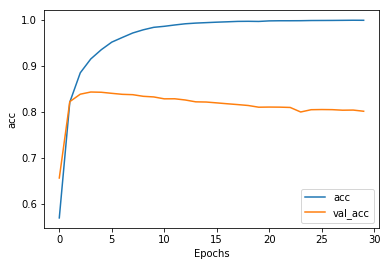

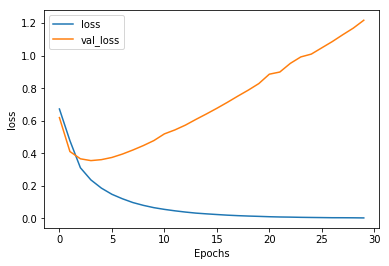

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' +string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [19]:
# Predict on a Sentence

sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

# The result is the probability for each class. The first value is the probability for Class - 0 and the second value is the probability for Class - 1

[[8.2697695e-01]
 [4.1572232e-05]]
